<a href="https://colab.research.google.com/github/anuragiiser/SS4201_Assignment_2/blob/main/Contour_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'R')

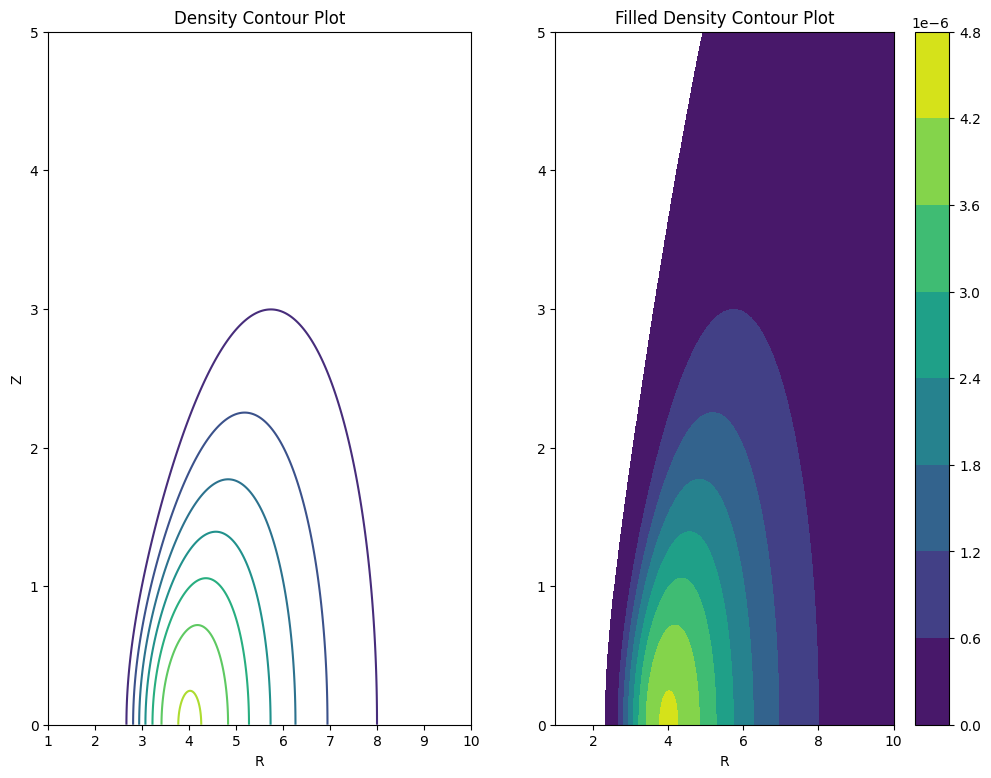

In [ ]:
feature_r = np.linspace(1, 10, 1000)
feature_z = np.linspace(0, 5, 1000)
[R, Z] = np.meshgrid(feature_r, feature_z)
 
fig, ax = plt.subplots(1, 2,figsize=(12,9))

G = 4/3
l0 = 2
K = 1
C = -0.06
rho = (((G-1)/(K*G))*(C+(1/np.sqrt(R**2+Z**2))-((l0**2)/(2*R**2))))**(1/(G-1))

CS1 = ax[0].contour(R, Z, rho, cmap=plt.cm.viridis)
CS2 = ax[1].contourf(R, Z, rho, cmap=plt.cm.viridis)  

ax[0].set_title('Density Contour Plot')
ax[0].set_xlabel('R')
ax[0].set_ylabel('Z')
cbar = fig.colorbar(CS2)
ax[1].set_title('Filled Density Contour Plot')
ax[1].set_xlabel('R')

In [ ]:
def rhofunc(R,Z):
  return (((G-1)/(K*G))*(C+(1/np.sqrt(R**2+Z**2))-
                         ((l0**2)/(2*R**2))))**(1/(G-1))

def points1(rho_list,fr,fz):
  pointsr1,pointsz1 = [],[]
  fig,ax = plt.subplots(1,1)
  for k in rho_list:
    pointsr,pointsz=[],[]
    for i in fr:
      for j in fz:
        if (np.abs(rhofunc(i,j) - k) <= 5*1e-9):
          pointsr.append(i)
          pointsz.append(j)
    ax.scatter(pointsr,pointsz,marker='.')
    pointsr1.append(pointsr)
    pointsz1.append(pointsz)
  plt.xlabel("R")
  plt.ylabel("Z")
  plt.title('Points on contours')
  plt.show()
  return pointsr1,pointsz1

In [ ]:
rho_list = 1e-6*np.array([0.6,1.2,1.8,2.4,3.0,3.6,4.2]) #0.6,1.2,1.8,2.4,3.0,3.6,4.2,4.8

feature_r = np.linspace(1, 10, 1000)
feature_z1 = np.linspace(0, 10, 1000,endpoint=True)
feature_z2 = np.linspace(-10, 0, 1000,endpoint=True)


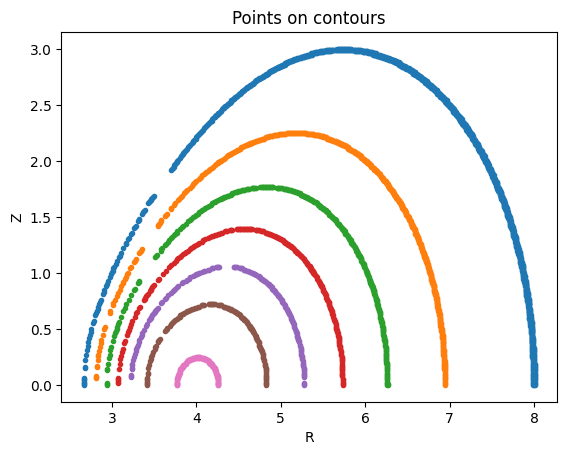

In [ ]:
pointsr1,pointsz1 = points1(rho_list,feature_r,feature_z1)

In [ ]:
def initialize(points):
  for i in range(len(points)):
    points[i][0] = 0
    points[i][-1] = 0
  return points

def my_interp(x, xp, fp):
    x = np.asarray(x)
    xp = np.asarray(xp)
    fp = np.asarray(fp)
    indices = np.searchsorted(xp, x)
    indices = np.clip(indices, 1, len(xp)-1)
    dx = xp[indices] - xp[indices-1]
    dy = fp[indices] - fp[indices-1]
    fractions = (x - xp[indices-1]) / dx
    return fp[indices-1] + fractions * dy

def linear_interpolation(x_values, y_values):
    x_interp = np.linspace(x_values[0], x_values[-1], 5000)
    y_interp = my_interp(x_interp, x_values, y_values)
    return x_interp,y_interp

In [ ]:
def points(rho_list,fr,fz):
  pointsr1,pointsz1 = [],[]
  for k in rho_list:
    pointsr,pointsz=[],[]
    for i in fr:
      for j in fz:
        if (np.abs(rhofunc(i,j) - k) <= 5*1e-9):
          pointsr.append(i)
          pointsz.append(j)
    pointsr1.append(pointsr)
    pointsz1.append(pointsz)
  return pointsr1,pointsz1

In [ ]:
def plot_contour(rho_list,feature_r,feature_z1): 

  pointsr1,pointsz1 = points(rho_list,feature_r,feature_z1)
  pointsr2,pointsz2 = points(rho_list,feature_r,feature_z2)
  x1,y1 = [],[]
  for i in range(len(pointsr1)):
    a,b = linear_interpolation(pointsr1[i], pointsz1[i])
    x1.append(a)
    y1.append(b)
  x2,y2 = [],[]
  for i in range(len(pointsr2)):
    a,b = linear_interpolation(pointsr2[i], pointsz2[i])
    x2.append(a)
    y2.append(b)
  x = x1+x2
  y = initialize(y1)+initialize(y2)
  fig,ax = plt.subplots(1,1,figsize=(8,6))
  for j in range(len(x)):
    ax.plot(x[j],y[j],'-',color='brown')
  plt.xlabel("R")
  plt.ylabel("Z")
  plt.title('Contour Lines')

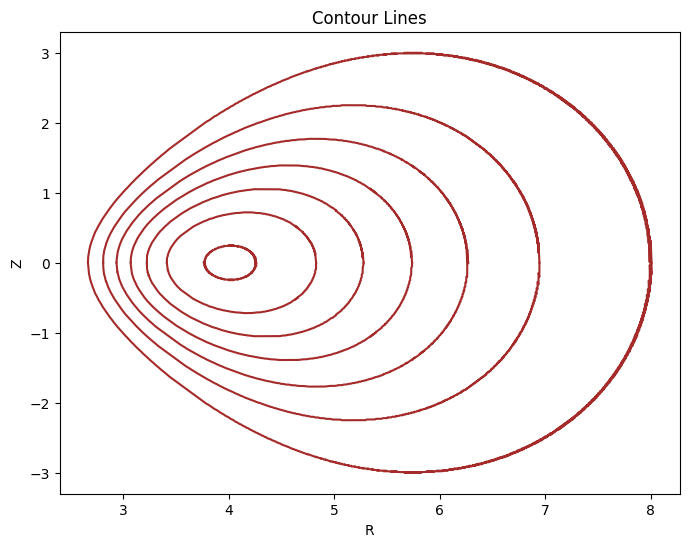

In [ ]:
plot_contour(rho_list,feature_r,feature_z1)